In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split

In [153]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    
)




In [154]:
test_dataset_path = 'C:\\Users\\Sam\\Downloads\\Compressed\\TEST'
train_dataset_path = 'C:\\Users\\Sam\\yoga classification\\train'

In [155]:
datagen=ImageDataGenerator(
rescale=1./255)

In [86]:
train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    color_mode='rgb'
)

Found 694 images belonging to 5 classes.


In [87]:
valid_generator=train_datagen.flow_from_directory(
    train_dataset_path,
   target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    color_mode='rgb'
)

Found 294 images belonging to 5 classes.


In [156]:
test_generator=datagen.flow_from_directory(
   test_dataset_path,
   target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
)

Found 470 images belonging to 5 classes.


In [62]:
# images,labels=train_generator.next()

In [63]:
# print(f'Image shape is {images.shape}')

In [64]:
# print(f'label shape is {labels.shape}')

**Converting Images valus to dataframe for analysis**

In [65]:
# images_array=images

In [66]:
# import numpy as np
# # import pandas as pd
# import seaborn as sns

In [67]:
# images_df = pd.DataFrame(images_array.reshape(images_array.shape[0], -1))

In [68]:
# classes=list(train_generator.class_indices.keys())

In [69]:
# original_class_names = [classes[i] for i in np.argmax(labels, axis=1)]

# Convert the original class names to a pandas DataFrame
# labels_df = pd.DataFrame(original_class_names, columns=['class'])

In [70]:
# Concatenating images and labels DataFrames horizontally
# df = pd.concat([images_df, labels_df], axis=1)

In [71]:
# df.head()

In [72]:
# sns.histplot(data=df,kde=True)

**Creating a CNN model**

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout

In [109]:
model=Sequential()
model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

#fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.65))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 17, 17, 128)     

In [111]:
# Assuming you have `train_generator` and `valid_generator` already defined from earlier
from keras.callbacks import EarlyStopping

# Define number of epochs
epochs = 10

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    callbacks=[early_stopping]
)


Epoch 1/10
22/22 [==============================] - 17s 721ms/step - loss: 1.7432 - accuracy: 0.2522 - val_loss: 1.3728 - val_accuracy: 0.5340
Epoch 2/10
22/22 [==============================] - 15s 681ms/step - loss: 1.3078 - accuracy: 0.4582 - val_loss: 0.9019 - val_accuracy: 0.7041
Epoch 3/10
22/22 [==============================] - 15s 680ms/step - loss: 0.9710 - accuracy: 0.6527 - val_loss: 0.5684 - val_accuracy: 0.7755
Epoch 4/10
22/22 [==============================] - 15s 680ms/step - loss: 0.7889 - accuracy: 0.6945 - val_loss: 0.4874 - val_accuracy: 0.8231
Epoch 5/10
22/22 [==============================] - 15s 697ms/step - loss: 0.5757 - accuracy: 0.7925 - val_loss: 0.3792 - val_accuracy: 0.8639
Epoch 6/10
22/22 [==============================] - 15s 685ms/step - loss: 0.4746 - accuracy: 0.8213 - val_loss: 0.3316 - val_accuracy: 0.8844
Epoch 7/10
22/22 [==============================] - 15s 691ms/step - loss: 0.3402 - accuracy: 0.8790 - val_loss: 0.3153 - val_accuracy: 0.8844

In [138]:
true_classes=test_generator.classes

In [157]:
predicted_classes=model.predict(test_generator)

15/15 [==============================] - 19s 1s/step


In [158]:
predicted_classes=np.argmax((predicted_classes),axis=1)

15/15 [==============================] - 20s 1s/step


<Axes: >

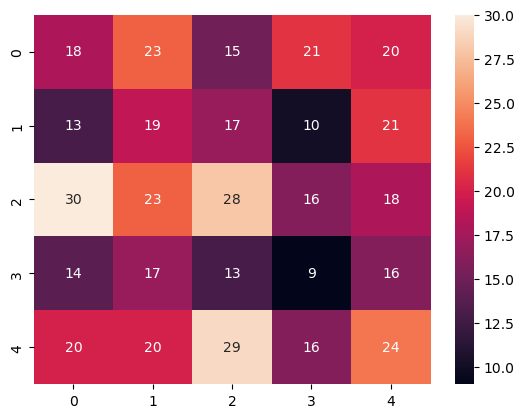

In [161]:
test_predictions = model.predict(test_generator, steps=len(test_generator))
test_predicted_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_true_labels, test_predicted_labels)
sns.heatmap(conf_matrix,annot=True)

In [160]:
cr=classification_report(test_true_labels, test_predicted_labels)

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.13      0.14        97
           1       0.21      0.26      0.23        80
           2       0.26      0.23      0.25       115
           3       0.11      0.12      0.11        69
           4       0.14      0.13      0.13       109

    accuracy                           0.18       470
   macro avg       0.17      0.18      0.17       470
weighted avg       0.18      0.18      0.18       470



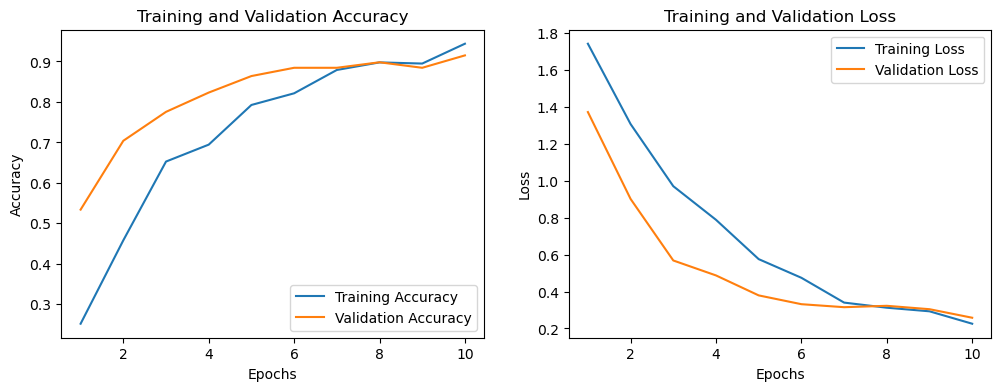

In [143]:
import matplotlib.pyplot as plt

#training and validation accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

#training and validation loss
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

#epochs range
epochs_range = range(1, len(training_accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


**Predictions on unseen data**

In [144]:
model.save('yoga_posses1.h5')

C:\Users\Sam\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_yoga_model.keras')

In [116]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.models import load_model


loaded_model = load_model('my_yoga_model.keras')
image=cv.imread('C:\\Users\\Sam\\Downloads\\Compressed\\archive_3\\DATASET\\TRAIN\plank\\00000177.jpg')
resized_image=cv.resize(image,(150,150))
scaled_image=(resized_image/255)
reshaped_img=scaled_image.reshape(1,150,150,3)
prediction=np.argmax(loaded_model.predict(reshaped_img))
if prediction ==0:
  predicted_class='Downdog Pose'
elif prediction==1:
  predicted_class='Goddes Pose'
elif prediction==2:
  predicted_class='Plank Pose'
elif prediction==3:
  predicted_class='Tree Pose'
elif prediction==4:
  predicted_class='Warrior Pose'
plt.imshow(image);
plt.title(predicted_class);
